In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

import os

In /home/prakhar/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/prakhar/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/prakhar/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/prakhar/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/prakhar/.local/lib/python3.6/site-packages/matplotlib/mpl-d

In [2]:
train_csv = pd.read_csv('./input/train.csv')

In [3]:
train_csv.head()

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


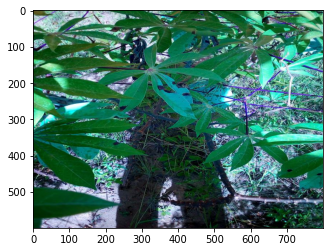

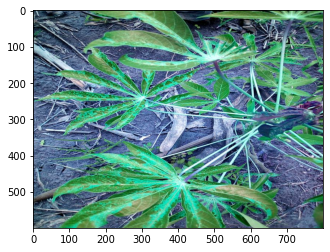

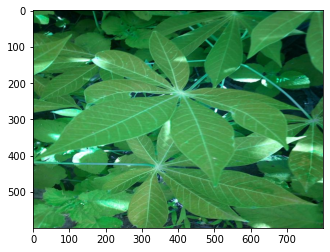

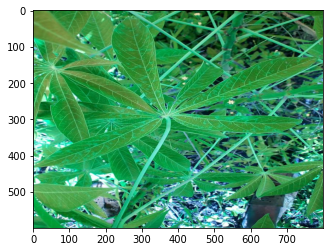

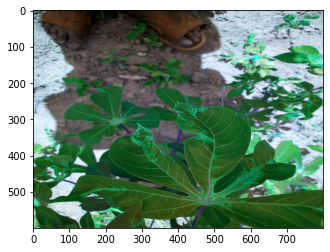

In [4]:
img_path = './input/train_images/'

for img_name in train_csv['image_id'][:5]:
    img = cv2.imread(os.path.join(img_path, img_name))
    plt.imshow(img)
    plt.show()

In [5]:
import torch
from torch.utils.data import Dataset, DataLoader 
from torchvision import transforms

import cv2

import os

TRAIN_PATH = './input/train_images/'

class CassavaDataset(Dataset):

    def __init__(self, dataframe, transform=None, dataset=False):
        self.df = dataframe
        self.transform = transform
        self.dataset = dataset

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):

        img_name = self.df.image_id.values[idx]	
        img_path = os.path.join(TRAIN_PATH, img_name)

        img = cv2.imread(img_path)
        img = cv2.resize(img, (512, 512))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img / 255
        img = torch.from_numpy(img)
        img = img.permute(2, 0, 1)
#         print(img.shape())
#         img = transforms.ToTensor(img)

        labels = self.df.loc[idx, ['label_0', 'label_1', 'label_2', 'label_3', 'label_4']].values
        labels = torch.from_numpy(labels.astype(np.int8))
        labels = labels.unsqueeze(-1)
#         print(labels)

        return img, labels

In [6]:
fold = 0
df = pd.read_csv('./input/train_ohe.csv')

train_df = df[df.kfold != fold][:8].reset_index(drop=True)
valid_df = df[df.kfold == fold].reset_index(drop=True)

train_dataset = CassavaDataset(train_df)
valid_dataset = CassavaDataset(valid_df)

train_dataloader = DataLoader(train_dataset, batch_size=4, num_workers=4, shuffle=True)
vaid_dataloader = DataLoader(valid_dataset, batch_size=4, num_workers=4, shuffle=True)

In [7]:
for batch in train_dataloader:
#     print(img.shape)
    print(batch[1].shape)

torch.Size([4, 5, 1])
torch.Size([4, 5, 1])


In [12]:
import torchvision.models as models
import torch.nn as nn

In [10]:
model = models.resnet18()

In [11]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [15]:
model.fc = nn.Linear(152, 5)

In [16]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  